In [1]:
from keras.layers import Input, Dense,Dropout, Flatten,Lambda
from keras.models import Model,Sequential
from sklearn.model_selection import train_test_split as tts
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from keras.utils import np_utils,plot_model
from keras.layers.convolutional import Convolution2D,MaxPooling2D,Conv2D
from keras import backend as K
from keras.losses import categorical_hinge,categorical_crossentropy
import tensorflow as tf
#from tensorflow.layers import flatten,batch_normialization as batch_norm

Using TensorFlow backend.
/home/slcf/.pyenv/versions/3.6.2/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from keras.datasets import fashion_mnist as mnist
import numpy as np
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
## Make the input image flat
n_features = np.prod(x_train.shape[1:])
xtrain = x_train.reshape((len(x_train),n_features))
xtest = x_test.reshape((len(x_test),n_features))

# CNN Classifier

In [4]:
### Construct Classifier
X_train = xtrain.reshape(xtrain.shape[0],28,28,1)
Y_train = np_utils.to_categorical(y_train)
X_test = xtest.reshape(xtest.shape[0],28,28,1)
Y_test = np_utils.to_categorical(y_test)
#Y_test = y_test
## in this example, we used sparse cross entropy loss!
num_classes = 10
Xtr, Xval, Ytr, Yval = tts(X_train,Y_train,test_size = 0.3)
#Xtr, Xval, Ytr, Yval = tts(Xtr,Ytr,test_size = 0.3)

In [5]:
print(Ytr.shape)

(42000, 10)


In [6]:
import sys
sys.path.append('../')
from mnist_clf import *
from mnist_dae import *

In [7]:
mnist_cnn = Mnist_CNN(X_train,Y_train)
print(Y_train.shape)

(60000, 10)


In [8]:
#mnist_cnn.train("../logs/fashion_mnist/fashion_mnist_CNN_clf.ckpt")
mnist_cnn.restore('../logs/fashion_mnist/fashion_mnist_CNN_clf.ckpt')

INFO:tensorflow:Restoring parameters from ../logs/fashion_mnist/fashion_mnist_CNN_clf.ckpt
Success!


In [9]:
mnist_cnn.accuracy_score(X_test,Y_test)

0.8962

In [10]:
_,xtest_n = corrupt(X_test,scale =0.2,noise_type = 'peppSalt')
test_acc = mnist_cnn.sess.run(mnist_cnn.accuracy,feed_dict = {mnist_cnn.eval_imgs:xtest_n,mnist_cnn.labels_eval:Y_test})
print(test_acc)

0.4581


In [11]:
print(mnist_cnn.accuracy_score(xtest_n,Y_test))

0.455


In [ ]:
## original: 0.9710
## noised: 0.9463
## reconstructed: 0.9557
# clean: 0.9942
# Gaussian: 0.9798(0.3)
# Corruption: 0.946(0.3)
# Pepp-and-salt: 0.7881(0.3)

##Fashion_mnist
#original: 0.8998
#gaussian: 0.6013
#corruption: 0.7622
#peppSalt: 0.3199
#adversarial: 

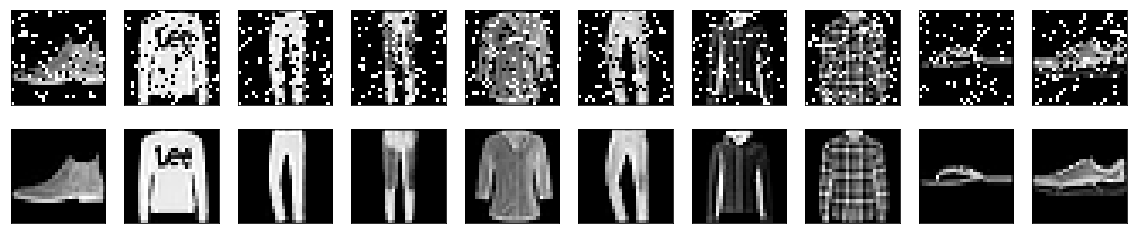

In [16]:
n=10
plt.figure(figsize = (20,4))
for i in range(n):
    # Display Original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(xtest_n[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax .get_yaxis().set_visible(False)
    
    # Display Reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [81]:
print(8./255.)

0.03137254901960784


# Adversarial Attacks

In [19]:
from scipy.misc import imsave

In [20]:
print("mnist_test_%d_%d_%d"%(12884,1,10))

mnist_test_12884_1_10


In [39]:
#mnist_cnn.targeted_attack(X_test,Y_test)
mnist_cnn.targeted_attack(X_test,Y_test,alpha=0.5,eps=128./255.,max_iter =10)

[0/10000] processed
[100/10000] processed
[200/10000] processed
[300/10000] processed
[400/10000] processed
[500/10000] processed
[600/10000] processed
[700/10000] processed
[800/10000] processed
[900/10000] processed
[1000/10000] processed
[1100/10000] processed
[1200/10000] processed
[1300/10000] processed
[1400/10000] processed
[1500/10000] processed
[1600/10000] processed
[1700/10000] processed
[1800/10000] processed
[1900/10000] processed
[2000/10000] processed
[2100/10000] processed
[2200/10000] processed
[2300/10000] processed
[2400/10000] processed
[2500/10000] processed
[2600/10000] processed
[2700/10000] processed
[2800/10000] processed
[2900/10000] processed
[3000/10000] processed
[3100/10000] processed
[3200/10000] processed
[3300/10000] processed
[3400/10000] processed
[3500/10000] processed
[3600/10000] processed
[3700/10000] processed
[3800/10000] processed
[3900/10000] processed
[4000/10000] processed
[4100/10000] processed
[4200/10000] processed
[4300/10000] processed


In [11]:
#X_adv = mnist_cnn.advX
#mnist_cnn.save_path = '../data/'
#mnist_cnn.save_np(X_adv,'fashion_mnist_adv2')
X_adv = np.load('../data/fashion_mnist_adv2.npy')
print(mnist_cnn.accuracy_score(X_adv,Y_test))

0.0206


# Mnist DAE

In [12]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

In [13]:
mnist_dae = Mnist_DAE(x_train,y_train)

In [14]:
#mnist_dae.train_dae()
#mnist_dae.save(save_path = '../results/fashion_mnist_dae.h5')
mnist_dae.load_model(load_path= '../results/fashion_mnist_dae.h5')

## Generate the corrupted images

In [15]:
## Gaussian noise images
_,x_ps = corrupt(x_test,scale =0.3,noise_type = 'peppSalt')

In [16]:
_,x_gs = corrupt(x_test,scale =0.5,noise_type = 'gaussian')

In [17]:
from time import time

mnist_cnn.accuracy_score(x_ps,Y_test)


0.30829999

In [18]:
mnist_cnn.accuracy_score(x_gs,Y_test)

0.2942

In [14]:
t1 = time()
x_ps_ds = mnist_dae.apply_DS(x_ps,vr = 0.95,max_iter=30)
t2 = time()-t1
print(t2/len(x_ps))
#x_gs_ds = mnist_dae.apply_DS(x_gs,vr=0.95)

-0.0018824741125106812


In [34]:
print(mnist_cnn.accuracy_score(x_ps_ds,Y_test))
print(mnist_cnn.accuracy_score(x_gs_ds,Y_test))

0.7607
0.7507


In [45]:
##Adv images
x_adv_ds = mnist_dae.apply_DS(X_adv,vr=0.95,max_iter=30)

In [46]:
print(mnist_cnn.accuracy_score(X_adv,Y_test))
print(mnist_cnn.accuracy_score(x_adv_ds,Y_test))

0.0206
0.4356


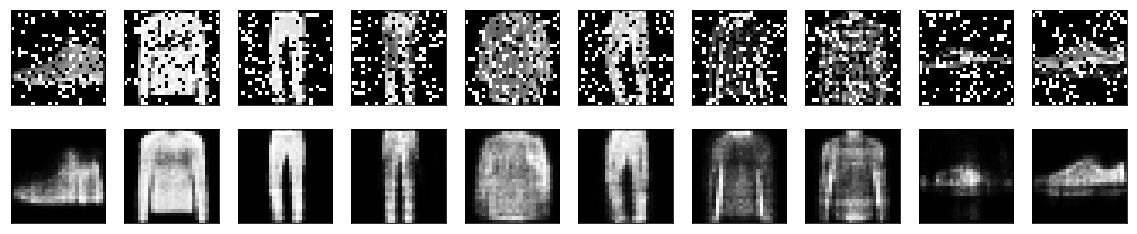

In [47]:
mnist_dae.plot_imgs(x_test)

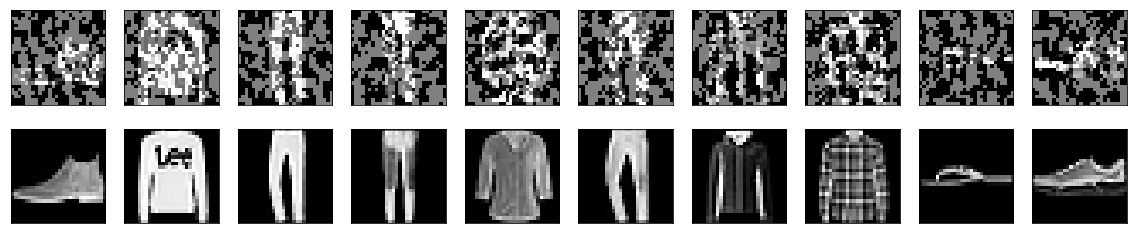

In [48]:
#print(len(adv_list))

n=10
plt.figure(figsize = (20,4))
for i in range(n):
    # Display Original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_adv[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax .get_yaxis().set_visible(False)
    
    # Display Reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Intermediate figures for DPS

In [21]:
print(x_ps.shape)
print(x_ps[1:2].shape)

(10000, 784)
(1, 784)


In [29]:
## apply ds to Pepp and Salt
itr = 30
x_itr = x_ps[1:2]

for i in range(itr):
    x_itr = mnist_dae.apply_DS(x_itr,vr = 0.95,max_iter=1)
    if i%5==0:
        plt.figure(figsize = (2,12))
        ax = plt.subplot(6,1,i/5+1)
        plt.imshow(x_itr.reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        #plt.savefig('../figures/fmnist_ds_'+str(i)+'.png')
        plt.show()

ValueError: num must be 1 <= num <= 6, not 0.0

# SVM classifier

In [35]:
from sklearn import svm
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components = 32)
x_pca = pca.fit_transform(x_train)
x_te_pca = pca.transform(x_test)
x_ps_pca = pca.transform(x_ps)
x_gs_pca = pca.transform(x_gs)
x_ps_ds_pca = pca.transform(x_ps_ds)
x_gs_ds_pca = pca.transform(x_gs_ds)
x_adv_pca = pca.transform(X_adv.reshape(X_adv.shape[0],-1))
x_adv_ds_pca = pca.transform(x_adv_ds)

In [50]:
clf = svm.SVC(C =10)
clf.fit(x_pca[:10000],y_train[:10000])

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
print(clf.score(x_te_pca,y_test))
print(clf.score(x_ps_pca,y_test))
print(clf.score(x_gs_pca,y_test))
print(clf.score(x_ps_ds_pca,y_test))
print(clf.score(x_gs_ds_pca,y_test))
print(clf.score(x_adv_pca,y_test))
print(clf.score(x_adv_ds_pca,y_test))

0.8608
0.6629
0.5381
0.774
0.775
0.3034
0.6029


In [ ]:
#####################
#### large cost #####
#####################
## no reduction
clf = svm.SVC(C =10)
clf.fit(x_train,y_train)
print(clf.score(x_test,y_test))
print(clf.score(x_ps,y_test))
print(clf.score(x_gs,y_test))
print(clf.score(x_ps_ds,y_test))
print(clf.score(x_gs_ds,y_test))
print(clf.score(X_adv.reshape(X_adv.shape[0],-1),y_test))
print(clf.score(x_adv_ds,y_test))